# Modelo base para generar ecuaciones de Euler-Lagrange

[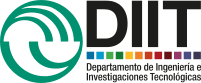](https://ingenieria.unlam.edu.ar/)    
2023 [Mariano Real](mailto:mreal@unlam.edu.ar) | [Víctor Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)

---


Esto es un miniresumen de lo que vieron en la teórica, para que puedan rellenar en cada caso el problema que tengan que resolver. MIREN la teórica, es fundamental tiene más información y está mejor explicada. La idea de esta notebook es simplmente un modelo que puedan usar cuando empiezan un ejercicio nuevo. 


Primero cargamos los paquetes necesarios

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

Definimos los parámetros físicos del sistema.

Acá hay que determinar todos los parámetros que necesitamos. Supongamos por ahora que sólo usamos los cinco de abajo $m_1,m_2,g,\ell_1,\ell_2$.

Y tenemos dos coordenadas generalizadas $\varphi_1, \varphi_2$

In [14]:
m1, m2, g, l1, l2 = sym.symbols('m1, m2, g, \ell_1, \ell_2', positive=True) # parámetros del sistema. El \ell es para usar la letra bonita de ele.

# Definimos las coordenadas generalizadas
e = mech.ReferenceFrame('e') # sistema de referencia en coordenadas cartesianas
t = sym.symbols('t') # tiempo
phi1 = sym.Function(r'\varphi_1')(t) # coordenada generalizada, una por cada grado de libertad
phi2 = sym.Function(r'\varphi_2')(t) # el r es para que el sistema considere el backslash \ como string

El primer paso siempre es escribir la posición de nuestras partículas, supongamos que el sistema tiene las posiciones de abajo

In [15]:
m1_r = l1*( sym.cos(phi1)* e.x + sym.sin(phi1)* e.y )
m2_r = m1_r + l2*( sym.cos(phi2)* e.x + sym.sin(phi2)* e.y )
m1_r, m2_r

## Energía cinética $T$
Escribimos la energía cinética del sistema

In [16]:
def energíaCinéticaPartícula(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Multiplicación de símbolos Sympy (sympy.core.mul.Mul)
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    # velocidad = posición.diff(t, marcoDeReferencia)
    unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    return unMedio* masa* velocidad.dot(velocidad)

In [19]:
# Energía cinética del sistema
T_m1 = energíaCinéticaPartícula(m1, m1_r, e)
T_m2 = energíaCinéticaPartícula(m2, m2_r, e)
T = sym.Eq(sym.Symbol('T'), T_m1 + T_m2 ).simplify()
# sym.Eq(lado iz, lado derecho)
# simplify: simplifica usando factor común y otras operaciones
T

## Energía Potencial $V$ gravitatoria
Escribimos la energía potencial del systema, usando lo que discutimos en clase 

$$ V_i = - \vec{P} \cdot \vec{r} $$

en la siguiente celda asumimos que tenemos sólo la fuerza peso y que tenemos dicha fuerza apuntando al revés que el versor $\hat y$

In [5]:
# Energía potencial
V = sym.Eq(sym.Symbol('V'), - (m1* g* (- e.y)).dot(m1_r) - (m2* g* (e.y)).dot(m2_r) ).simplify()
V

## Lagrangiano $\mathcal L$

$\mathcal L = T - V$

In [6]:
L = sym.Eq(sym.Function('\mathcal{L}')(phi1, phi2, phi1.diff(t), phi2.diff(t) ) , T.rhs - V.rhs )
# algo.rhs = lado derecho de la ecuación (right hand side)
# algo.lhs = lado izquierdo de la ecuación (left hand side) 
L

## Ecuaciones Euler-Lagrange (EL) 

Hacemos una ecuación por cada variable, copio pego y renombro la variable a mirar y la ecuación final

In [7]:
coordGen = phi1 # ponemos acá la coordenada generalizada para la que queremos generar E-L
lagrangiano = L
ecuacionEL = \
  sym.Eq( 
      lagrangiano.rhs.diff(coordGen) - lagrangiano.rhs.diff(coordGen.diff(t)).diff(t) 
      ).simplify()

phi1_EL = ecuacionEL # acá simplemente nombro la ecuación de Euler-Lagrange
phi1_EL

In [8]:
coordGen = phi2 # ponemos acá la coordenada generalizada para la que queremos generar E-L
lagrangiano = L   # decimos quién es el lagrangiano
ecuacionEL = \
  sym.Eq( 
      lagrangiano.rhs.diff(coordGen) - lagrangiano.rhs.diff(coordGen.diff(t)).diff(t) 
      ).simplify()

phi2_EL = ecuacionEL # acá simplemente nombro la ecuación de Euler-Lagrange
phi2_EL

## A incluir a futuro

Sería muy bueno incluir substituciones para que lo tengan todo junto.